# Lehner White
## Math 403
## Pandas I

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1

In [2]:
s1 = pd.Series(np.full(5, -3.), index=2*np.arange(1,6))
print(s1)
s2 = pd.Series({'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26})
print(s2)

2    -3.0
4    -3.0
6    -3.0
8    -3.0
10   -3.0
dtype: float64
Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64


## Problem 2

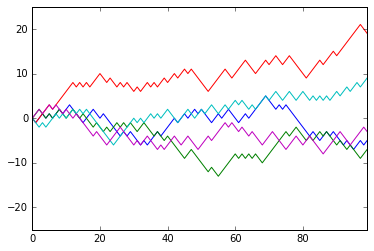

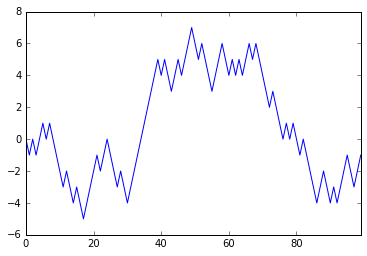

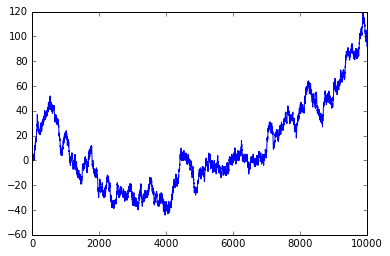

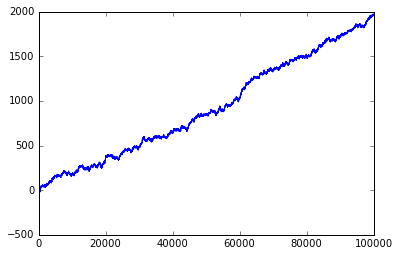

In [3]:
for i in xrange(5):
    N = 100 # length of random walk
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1 #coin flips
    s = pd.Series(s)
    s = s.cumsum() # random walk
    s.plot()
plt.ylim([-25, 25])
plt.show()
    
for N in [100,10000,100000]:
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1 #coin flips
    s = pd.Series(s)
    s = s.cumsum() # random walk
    s.plot()
    plt.show()


## Problem 3

In [4]:
#build toy data for SQL operations
name = ['Bill', 'Alice', 'Joe', 'Jenny', 'Ted', 'Taylor', 'Tracy', 'Morgan','Liz']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

print studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID','Name']]

   ID   Name
0   0   Bill
6   6  Tracy


## Problem 4

In [5]:
print pd.merge(studentInfo, otherInfo, on='ID', how='outer')[studentInfo['Sex'] == 'M'][['ID', 'Age', 'GPA']]

   ID  Age  GPA
0   0   20  3.8
2   2   18  3.0
4   4   19  2.8
6   6   20  3.8
7   7   19  3.4


## Problem 5

**Import Crime Data**

In [6]:
crime = pd.read_csv('crime_data.txt', skiprows=0, header = 1, index_col=0)

**Add "Crime_Rate" Column to the data Frame**

In [7]:
crime['Crime Rate'] = crime['Total'] / crime['Population']

**Plot Crime Rate as a function of Year**

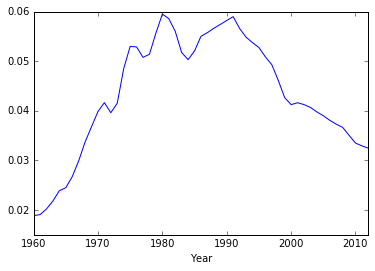

In [8]:
crime['Crime Rate'].plot()
plt.show()

**List 5 years with highest crime rate in descending order**

In [9]:
print list(crime.sort_values('Crime Rate', ascending = False).index)[:5]

[1980, 1991, 1981, 1990, 1989]


**Calculate average number of total crimes as well as burglary crimes between 1960 and 2012**

In [10]:
mean_tot = crime[(crime.index > 1960) & (crime.index < 2012)]['Total'].mean()
print mean_tot
mean_bur = crime[(crime.index > 1960) & (crime.index < 2012)]['Burglary'].mean()
print mean_bur

10789088.3529
2483083.96078


**Find the years for which the total number of crimes was above average and the years for which it was below average**

In [11]:
print list(crime[(crime['Total'] > mean_tot)].index)
print list(crime[(crime['Total'] < mean_tot)].index)

[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 2009, 2010, 2011, 2012]


**Plot number of murders as a function of the population**

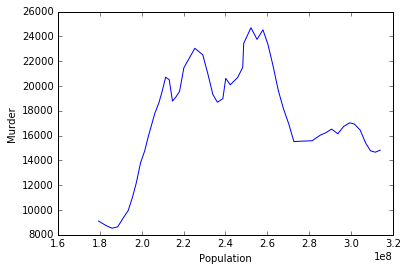

In [12]:
plt.plot(crime['Population'], crime['Murder'])
plt.xlabel('Population')
plt.ylabel('Murder')
plt.show()

**Select Population, Violent, and Robbery columns for all years in the 1980's and save this subset to the file "crime_subset.txt"**

In [13]:
new = crime[(crime.index > 1979) & (crime.index < 1990)][['Population', 'Violent', 'Robbery']]
new.to_csv('crime_subset.txt')